<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Maria Paula Pérez Romo y José de Jesús Carbajal

**Fecha:** 12 de Marzo del 2025.

**Expediente** : 743859 y ..
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**:https://github.com/MPST-2025-I/tarea-4-ejercicio-cnn-tarea-4-4

# Tarea 4: Clase 11

## Enunciado de tarea (Transcibirlo)
Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:


### Ejercicio 1: 
El objetivo en este ejercicio es que usen una CNN para predecir el precio de las casas. Este dataset, ya tiene todas las características a ser usadas por el modelo, así que no tienen que realizar alguna preparación especial de los datos. Sólo buscar la mejor estructura de la CNN que les de mejores resultados.


Solucion Maria Paula

In [118]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt


In [102]:
df = pd.read_csv("data/Housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [103]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [104]:
le = LabelEncoder()
df["furnishingstatus"] = le.fit_transform(df["furnishingstatus"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0


In [105]:
le = LabelEncoder()
df["mainroad"] = le.fit_transform(df["mainroad"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,0
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,0


In [106]:
le = LabelEncoder()
df["guestroom"] = le.fit_transform(df["guestroom"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,0
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,0


In [107]:
le = LabelEncoder()
df["basement"] = le.fit_transform(df["basement"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,0
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,0
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,1
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,0
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,0


In [108]:
le = LabelEncoder()
df["hotwaterheating"] = le.fit_transform(df["hotwaterheating"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,0
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,0
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,1
3,12215000,7500,4,2,2,1,0,1,0,yes,3,yes,0
4,11410000,7420,4,1,2,1,1,1,0,yes,2,no,0


In [109]:
le = LabelEncoder()
df["airconditioning"] = le.fit_transform(df["airconditioning"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,0


In [110]:
le = LabelEncoder()
df["prefarea"] = le.fit_transform(df["prefarea"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [111]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Listo, ya son todas variables númericas. Para poderle dar los datos a la red de una manera que pueda entender será necesario hacer alguna transformación a mis datos. 

In [112]:
X = df.drop(columns=['price'])
y = df['price'] #variable a predecir

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))



Hago un escalamiento ya que las redes neuronales son sensibles a las escalas de datos. Como el precio esta en un rango amplio, y hay otras variables que solo tienen valores pequeños, es mejor que normalize x para mejorar la estabilidad del entrenamiento.

In [115]:

model = Sequential([
    # Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    # Dropout(0.2),

    Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),

    Dense(1) 
])

model.summary()


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [116]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=500, batch_size=100, validation_data=(X_test_scaled, y_test_scaled))


Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3115 - mae: 0.3489 - val_loss: 0.2222 - val_mae: 0.2045
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1932 - mae: 0.1596 - val_loss: 0.1801 - val_mae: 0.1547
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1736 - mae: 0.1436 - val_loss: 0.1717 - val_mae: 0.1455
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1686 - mae: 0.1412 - val_loss: 0.1649 - val_mae: 0.1351
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1635 - mae: 0.1274 - val_loss: 0.1636 - val_mae: 0.1386
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1544 - mae: 0.1193 - val_loss: 0.1581 - val_mae: 0.1346
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1481 - mae: 0.1194 - val_loss: 0.1490 - val_mae: 0.1232
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1412 - mae: 0.1118 - val_loss: 0.1414 - val_mae: 0.1144
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1352 - mae: 0.1082 -

In [117]:
y_pred_scaled = model.predict(X_test_scaled)  
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()  

# Evaluar el error en la escala original
mae_real = np.mean(np.abs(y_test.values - y_pred)) 
print(f"MAE real en precios: {mae_real:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MAE real en precios: 984885.56


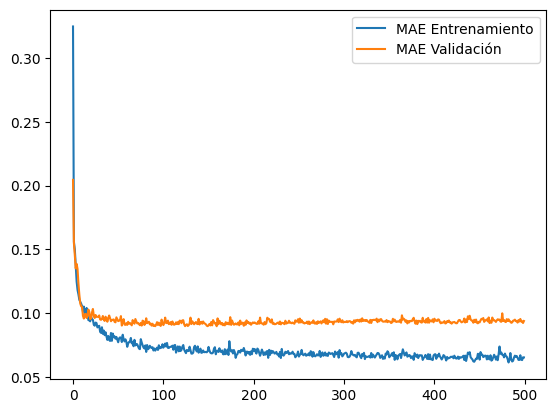

In [119]:

plt.plot(history.history['mae'], label='MAE Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE Validación')
plt.legend()
plt.show()


In [124]:
df_pred = pd.DataFrame({'Real': y_test.values.flatten(), 'Predicho': y_pred.flatten()})
print(df_pred.sample(3))

       Real   Predicho
63  3080000  3585170.5
72  3780000  4329106.5
96  5810000  4913544.5


No se ajusto de la mejor manera la red neuronal, pero creo que se obtuvieron resultados aceptables. Intente ponerle un mayor learning rate, un mayor dropout, y mayor epocas. El menor mae que pude conseguir fue 996269.76.

## Parte 2
Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

In [1]:
import os
import pandas as pd
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D

/Users/maripau/Desktop/ITESO/No lineales/noLinealesVenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:

folder_path = "data/australia"

# Obtener lista de archivos CSV en la carpeta
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Leer y concatenar todos los CSV
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
df_concatenado = pd.concat(df_list, ignore_index=True)

# Guardar el resultado en un nuevo archivo CSV
df_concatenado.to_csv(os.path.join(folder_path, "csv_concatenado.csv"), index=False)

print(f"Se han concatenado {len(csv_files)} archivos en 'csv_concatenado.csv'")


Se han concatenado 67 archivos en 'csv_concatenado.csv'


In [3]:
df1 = pd.read_csv("data/australia/csv_concatenado.csv")
df1

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2022/07/01 00:05:00,8656.59,396.62,TRADE
1,NSW1,2022/07/01 00:10:00,8539.53,380.41,TRADE
2,NSW1,2022/07/01 00:15:00,8591.66,380.41,TRADE
3,NSW1,2022/07/01 00:20:00,8601.76,380.41,TRADE
4,NSW1,2022/07/01 00:25:00,8518.26,371.29,TRADE
...,...,...,...,...,...
1740139,NSW1,2020/04/30 22:00:00,7823.41,21.76,TRADE
1740140,NSW1,2020/04/30 22:30:00,7850.90,27.91,TRADE
1740141,NSW1,2020/04/30 23:00:00,7696.18,28.33,TRADE
1740142,NSW1,2020/04/30 23:30:00,7623.36,41.96,TRADE


In [4]:
# Reemplazar las barras '/' por guiones '-'
df1['SETTLEMENTDATE'] = df1['SETTLEMENTDATE'].str.replace('-', '/', regex=True)
df1

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2022/07/01 00:05:00,8656.59,396.62,TRADE
1,NSW1,2022/07/01 00:10:00,8539.53,380.41,TRADE
2,NSW1,2022/07/01 00:15:00,8591.66,380.41,TRADE
3,NSW1,2022/07/01 00:20:00,8601.76,380.41,TRADE
4,NSW1,2022/07/01 00:25:00,8518.26,371.29,TRADE
...,...,...,...,...,...
1740139,NSW1,2020/04/30 22:00:00,7823.41,21.76,TRADE
1740140,NSW1,2020/04/30 22:30:00,7850.90,27.91,TRADE
1740141,NSW1,2020/04/30 23:00:00,7696.18,28.33,TRADE
1740142,NSW1,2020/04/30 23:30:00,7623.36,41.96,TRADE


Aqui se tiene que hacer un truquito por como estan guardadas las fechas.

In [5]:

df1 = df1.sort_values(by='SETTLEMENTDATE', ignore_index=True)
df1.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [6]:
df1["REGION"].unique()
df1 = df1.drop(columns=["REGION"], axis=1)
df1

,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,2018/01/01 00:30:00,6912.25,91.86,TRADE
1,2018/01/01 00:30:00,6912.25,91.86,TRADE
2,2018/01/01 00:30:00,6912.25,91.86,TRADE
3,2018/01/01 00:30:00,6912.25,91.86,TRADE
4,2018/01/01 00:30:00,6912.25,91.86,TRADE
...,...,...,...,...
1740139,2023/06/28 00:00:00,8394.93,64.77,TRADE
1740140,2023/06/28 00:00:00,8394.93,64.77,TRADE
1740141,2023/06/28 00:00:00,8394.93,64.77,TRADE
1740142,2023/06/28 00:00:00,8394.93,64.77,TRADE


In [7]:
df1["PERIODTYPE"].unique()
df1 = df1.drop(columns=["PERIODTYPE"], axis=1)
df1

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,2018/01/01 00:30:00,6912.25,91.86
1,2018/01/01 00:30:00,6912.25,91.86
2,2018/01/01 00:30:00,6912.25,91.86
3,2018/01/01 00:30:00,6912.25,91.86
4,2018/01/01 00:30:00,6912.25,91.86
...,...,...,...
1740139,2023/06/28 00:00:00,8394.93,64.77
1740140,2023/06/28 00:00:00,8394.93,64.77
1740141,2023/06/28 00:00:00,8394.93,64.77
1740142,2023/06/28 00:00:00,8394.93,64.77


In [8]:
df1.isnull().sum()

SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
dtype: int64

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler

In [10]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [11]:
n_steps = 3 #numero de pasos de tiempo
sequence = df1['TOTALDEMAND'].values
X, y = split_sequence(sequence, n_steps)
print('X', X, 'y', y, sep='\n')


X
[[6912.25 6912.25 6912.25]
 [6912.25 6912.25 6912.25]
 [6912.25 6912.25 6912.25]
 ...
 [8394.93 8394.93 8394.93]
 [8394.93 8394.93 8394.93]
 [8394.93 8394.93 8394.93]]
y
[6912.25 6912.25 6912.25 ... 8394.93 8394.93 8394.93]


In [12]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [13]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model1 = Sequential([
    keras.layers.Input(shape=(n_steps,)),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(1)
])

# Compile the model with a different optimizer and learning rate
optimizer = Adam(learning_rate=0.01)
model1.compile(optimizer=optimizer, loss='mae', metrics=[tf.metrics.mape, tf.metrics.mse])

# Summarize the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [14]:
# Ajustemos nuestro modelo compilado
history1 = model1.fit(X, y, epochs=50, verbose=True)

Epoch 1/50
54380/54380 ━━━━━━━━━━━━━━━━━━━━ 24s 428us/step - loss: 503.0986 - mean_absolute_percentage_error: 6.6129 - mean_squared_error: 989584.9375
Epoch 2/50
54380/54380 ━━━━━━━━━━━━━━━━━━━━ 23s 421us/step - loss: 264.3038 - mean_absolute_percentage_error: 3.4459 - mean_squared_error: 123518.6172
Epoch 3/50
54380/54380 ━━━━━━━━━━━━━━━━━━━━ 23s 422us/step - loss: 242.4021 - mean_absolute_percentage_error: 3.1551 - mean_squared_error: 104825.5938
Epoch 4/50
54380/54380 ━━━━━━━━━━━━━━━━━━━━ 23s 426us/step - loss: 238.7218 - mean_absolute_percentage_error: 3.1090 - mean_squared_error: 100896.1172
Epoch 5/50
54380/54380 ━━━━━━━━━━━━━━━━━━━━ 23s 423us/step - loss: 239.5501 - mean_absolute_percentage_error: 3.1171 - mean_squared_error: 101693.0859
Epoch 6/50
54380/54380 ━━━━━━━━━━━━━━━━━━━━ 23s 430us/step - loss: 238.0642 - mean_absolute_percentage_error: 3.0989 - mean_squared_error: 100313.2188
Epoch 7/50
54380/54380 ━━━━━━━━━━━━━━━━━━━━ 23s 427us/step - loss: 237.9643 - mean_absolute_pe

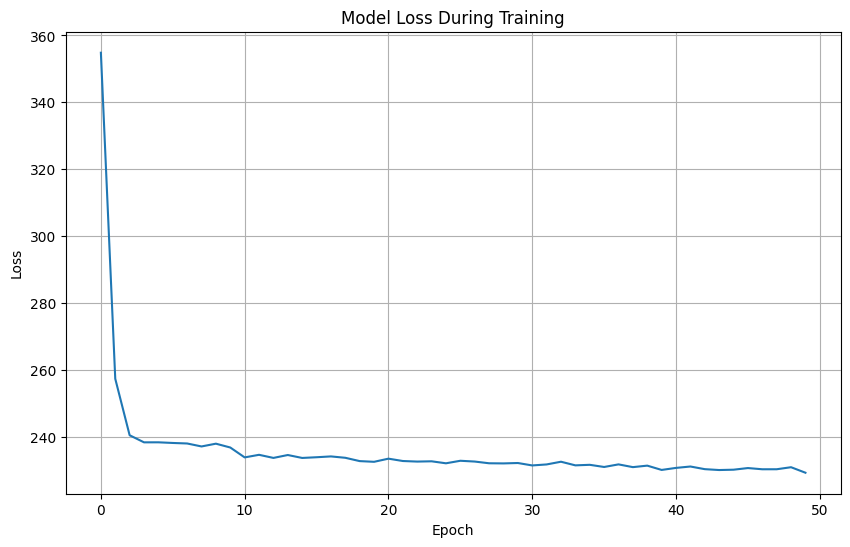

In [15]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(model1.history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

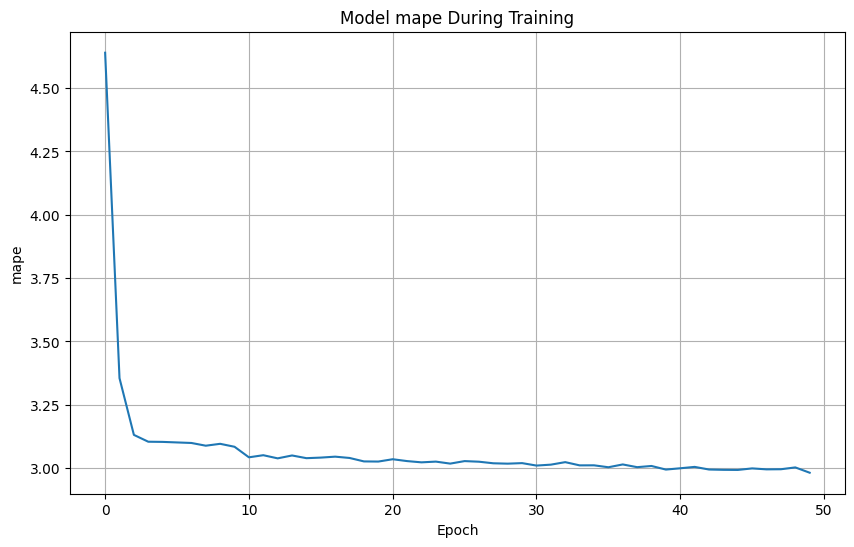

In [16]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(model1.history.history['mean_absolute_percentage_error'])
plt.title('Model mape During Training')
plt.xlabel('Epoch')
plt.ylabel('mape')
plt.grid(True)
plt.show()

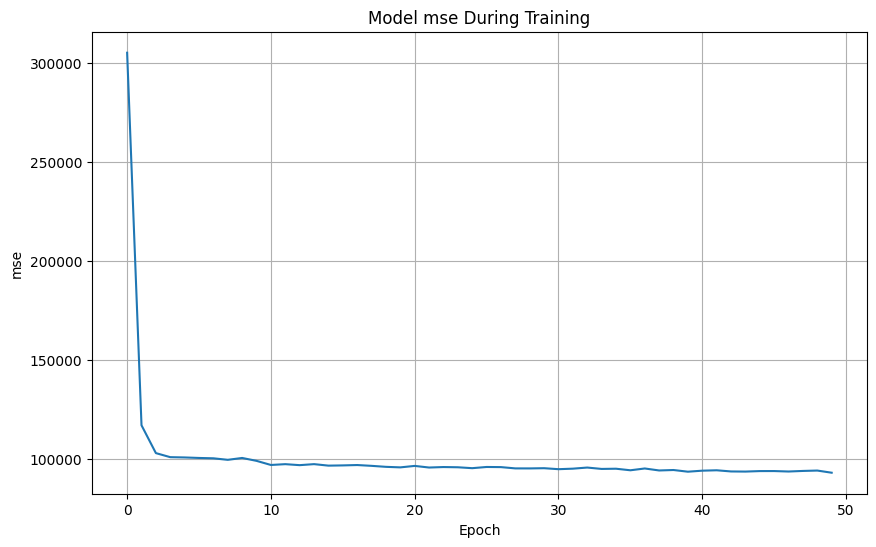

In [17]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(model1.history.history['mean_squared_error'])
plt.title('Model mse During Training')
plt.xlabel('Epoch')
plt.ylabel('mse')
plt.grid(True)
plt.show()

In [18]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Make predictions on validation set
y_pred = model1.predict(X_val)


10876/10876 ━━━━━━━━━━━━━━━━━━━━ 2s 198us/step


Mean Absolute Error: 577.0188
R² Score: 0.7053


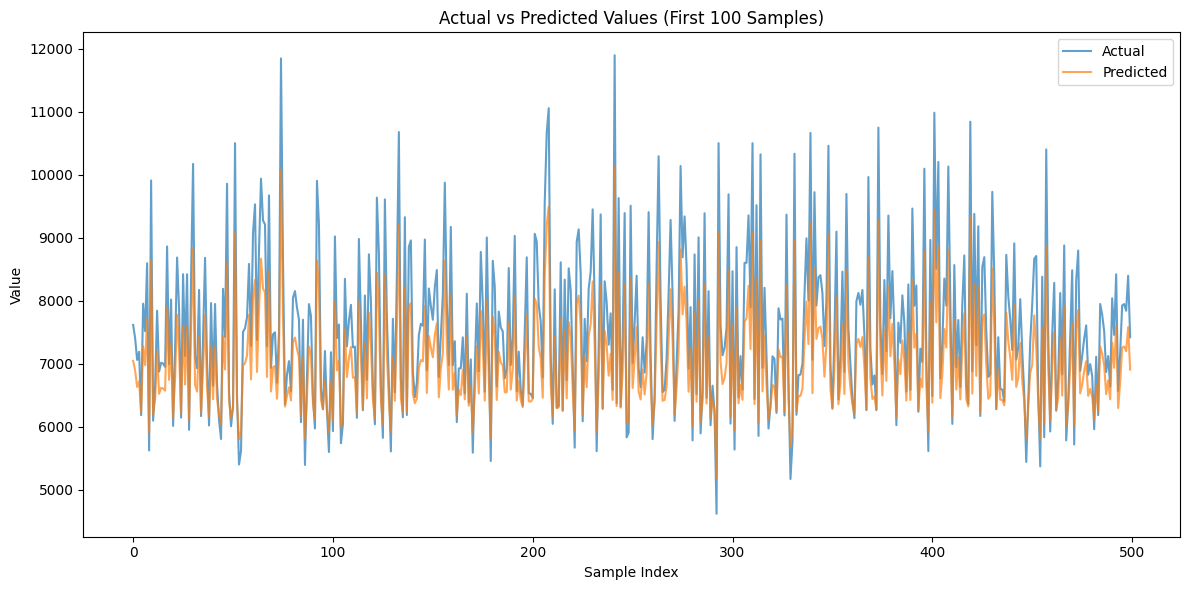

In [20]:
# Calculate and print some error metrics
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot a sample of predictions vs actual values
plt.figure(figsize=(12, 6))
sample_size = 500
plt.plot(y_val[:sample_size], label='Actual', alpha=0.7)
plt.plot(y_pred[:sample_size], label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


# 2 Modelo multivariado

In [21]:
demand = df1['TOTALDEMAND'].values.reshape(-1, 1)
price = df1['RRP'].values.reshape(-1, 1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
demand_scaled = scaler.fit_transform(demand)
price_scaled = scaler.fit_transform(price)

In [23]:
output_seq = demand_scaled + price_scaled
output_seq.shape

(1740144, 1)

In [24]:
output_seq

array([[0.36944277],
       [0.36944277],
       [0.36944277],
       ...,
       [0.51997089],
       [0.51997089],
       [0.51997089]])

In [25]:
df_multi = np.hstack((demand_scaled, price_scaled, output_seq))
df_multi.shape

(1740144, 3)

In [26]:
# hacer un subset de las series
df_multi_subset = df_multi[:10000, :]
df_multi_subset.shape
# dividir una secuencia multivariada en muestras

(10000, 3)

In [27]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [28]:
n_steps = 24 #numero de pasos de tiempo horas

X, y = split_multivariate_sequence(df_multi_subset, n_steps)

n_features = X.shape[2]

X.shape, y.shape

((9977, 24, 2), (9977,))

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import Adam

In [31]:
# Define the model
model_2 = Sequential()
model_2.add(LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')

# Train the model
history_2 = model_2.fit(X, y, epochs=100, verbose=1)

# Model summary

Epoch 1/100


/Users/maripau/Desktop/ITESO/No lineales/noLinealesVenv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0646
Epoch 2/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0565e-04
Epoch 3/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8815e-04
Epoch 4/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2132e-04
Epoch 5/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3437e-05
Epoch 6/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7761e-05
Epoch 7/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9285e-05
Epoch 8/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8133e-05
Epoch 9/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8817e-05
Epoch 10/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6071e-05
Epoch 11/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5347e-05
Epoch 12/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2066e-05
Epoch 13/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5572e-05
Epoch 14/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1748e-05
Epo

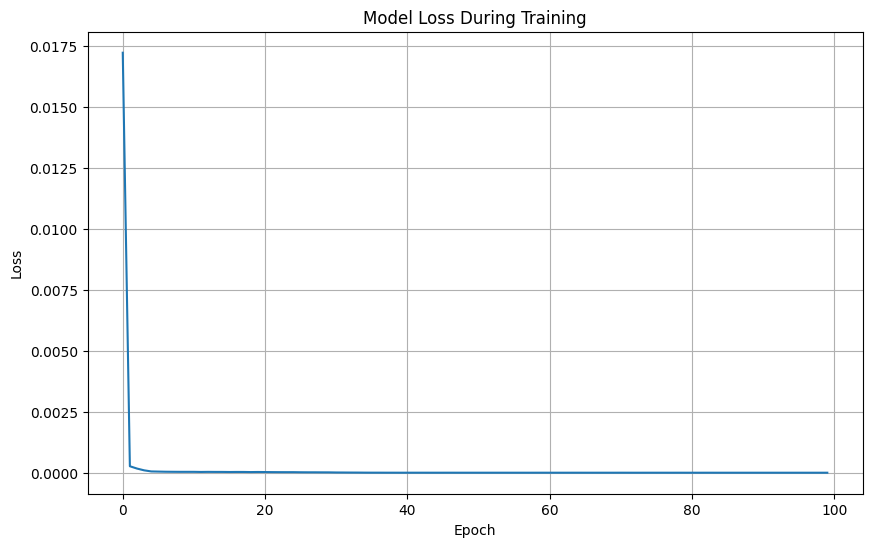

In [32]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(model_2.history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

In [33]:
# hacer una prediccion
x_input = df_multi[-24:, :-1].reshape(1, 24, 2)
yhat = model_2.predict(x_input, verbose=0)
print(f'Predicción: {scaler.inverse_transform(yhat.reshape(-1,1))}')

Predicción: [[7574.261]]


# multiple encabezamiento

In [34]:
# Definir parámetros
n_steps = 24
n_features = 1

In [35]:
from keras.layers import Input

In [36]:
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

In [37]:
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

In [38]:
from keras.layers import concatenate
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

In [39]:
from keras.models import Model

In [40]:
# Conectar entradas y salida del modelo
model_3 = Model(inputs=[visible1, visible2], outputs=output)

model_3.compile(optimizer='adam', loss='mse')

model_3.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 24, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 24, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 23, 64)    │        192 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 23, 64)    │        192 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 11, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 11, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 704)       │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 704)       │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1408)      │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 50)        │     70,450 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         51 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 70,885 (276.89 KB)

 Trainable params: 70,885 (276.89 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)

In [43]:
history_3 = model_3.fit([X1, X2], y, epochs=200, verbose=1)

Epoch 1/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 3.1288e-05
Epoch 2/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 2.6289e-05
Epoch 3/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 2.5387e-05
Epoch 4/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 2.8681e-05
Epoch 5/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 2.7711e-05
Epoch 6/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 2.9713e-05
Epoch 7/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 3.0056e-05
Epoch 8/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 3.3826e-05
Epoch 9/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 2.5052e-05
Epoch 10/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 3.1851e-05
Epoch 11/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 2.3643e-05
Epoch 12/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 2.6600e-05
Epoch 13/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 2.6032e-05
Epoch 14/200
312/312 ━━━━━━━━━━━━━

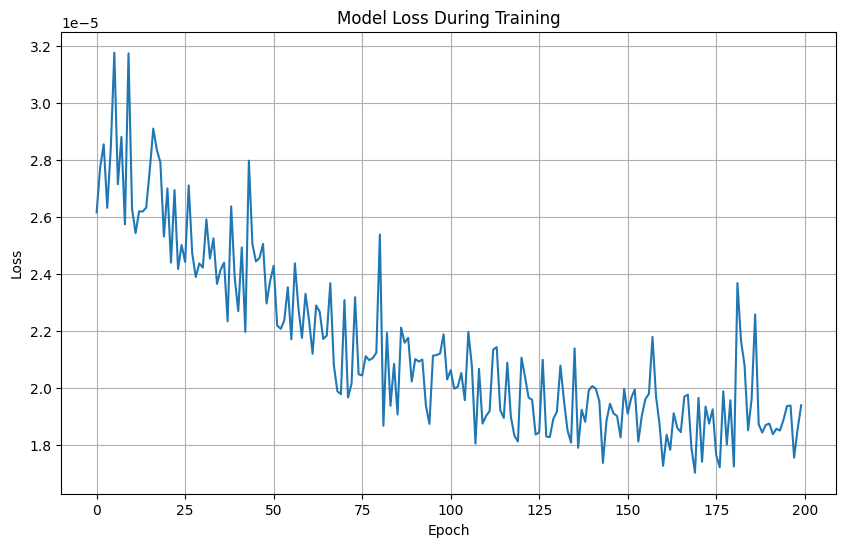

In [44]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(model_3.history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

In [45]:
#hacer una prediccion
x_input = df_multi[-24:, :-1].reshape(1, 24, 2)
yhat = model_3.predict([x_input[:, :, 0], x_input[:, :, 1]], verbose=0)
print(f'Predicción: {scaler.inverse_transform(yhat.reshape(-1,1))}')




Predicción: [[7518.886]]


# mulriples series paralelas

In [46]:
# hacer un subset de las series
df_multi_subset = df_multi[:10000, :]
df_multi_subset.shape
# dividir una secuencia multivariada en muestras

(10000, 3)

In [47]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [48]:
X_m, y_m = split_multiple_forecasting_sequence(df_multi_subset, n_steps)

X_m.shape, y_m.shape

((9976, 24, 3), (9976, 3))

In [49]:
n_steps, X_m.shape[2]

(24, 3)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM, Reshape
from tensorflow.keras.optimizers import Adam

In [51]:
n_features = X_m.shape[2]

model_4 = Sequential()
model_4.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model_4.add(Dense(25, activation='relu'))
model_4.add(Dense(1))
model_4.compile(optimizer='adam', loss='mse')


model_4.summary()

/Users/maripau/Desktop/ITESO/No lineales/noLinealesVenv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,101 (47.27 KB)

 Trainable params: 12,101 (47.27 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history_4 = model_4.fit(X_m, y_m, epochs=50, verbose=1)

Epoch 1/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0668
Epoch 2/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0456
Epoch 3/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0453
Epoch 4/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0454
Epoch 5/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0458
Epoch 6/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0452
Epoch 7/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0448
Epoch 8/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0448
Epoch 9/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0455
Epoch 10/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0451
Epoch 11/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0448
Epoch 12/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0453
Epoch 13/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0455
Epoch 14/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0443
Epoch 15/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

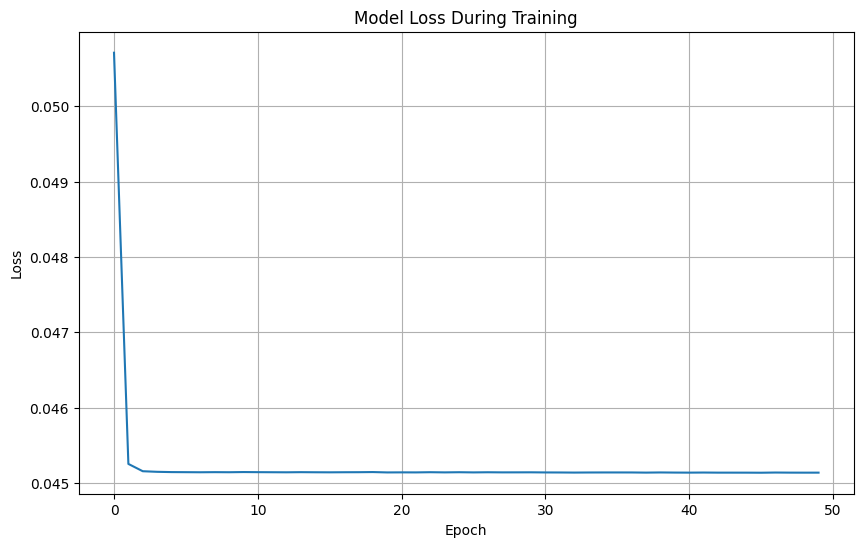

In [53]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(model_4.history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

In [54]:
# hacer una prediccion

x_input = df_multi_subset[-n_steps:, :].reshape(1, n_steps, n_features)
yhat = model_4.predict(x_input, verbose=0)
print(f'Predicción: {scaler.inverse_transform(yhat.reshape(-1,1))}')


Predicción: [[7572.7583]]


# Multioutput 

In [55]:
n_steps = X_m.shape[1]
n_features = X_m.shape[2]

visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)
cnn1 = Dense(50, activation='relu')(cnn1)

In [56]:
outputs = Dense(n_features)(cnn1)
outputs2 = Dense(n_features)(cnn1)
outputs3 = Dense(n_features)(cnn1)

In [57]:
#lo juntamos en un modelo
model_5 = Model(inputs=visible1, outputs=[outputs, outputs2, outputs3])
model_5.compile(optimizer='adam', loss='mse')

model_5.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 24, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 23, 64)    │        448 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 11, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 704)       │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 50)        │     35,250 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 3)         │        153 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 3)         │        153 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 3)         │        153 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 36,157 (141.24 KB)

 Trainable params: 36,157 (141.24 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
#separar las salidas
y1 = y_m[:, 0].reshape((y_m.shape[0], 1))
y2 = y_m[:, 1].reshape((y_m.shape[0], 1))
y3 = y_m[:, 2].reshape((y_m.shape[0], 1))

In [59]:
history_5 = model_5.fit(X_m, [y1, y2, y3], epochs=500, verbose=1)

Epoch 1/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - dense_11_loss: 0.0156 - dense_12_loss: 5.7315e-04 - dense_13_loss: 0.0251 - loss: 0.0413
Epoch 2/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - dense_11_loss: 1.8324e-04 - dense_12_loss: 8.4424e-06 - dense_13_loss: 1.1223e-04 - loss: 3.0391e-04
Epoch 3/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - dense_11_loss: 9.6931e-05 - dense_12_loss: 3.7374e-06 - dense_13_loss: 1.0732e-04 - loss: 2.0799e-04
Epoch 4/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - dense_11_loss: 9.2236e-05 - dense_12_loss: 4.7841e-06 - dense_13_loss: 1.0280e-04 - loss: 1.9982e-04
Epoch 5/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - dense_11_loss: 8.3087e-05 - dense_12_loss: 3.9835e-06 - dense_13_loss: 9.1705e-05 - loss: 1.7878e-04
Epoch 6/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - dense_11_loss: 7.8966e-05 - dense_12_loss: 3.6631e-06 - dense_13_loss: 8.6389e-05 - loss: 1.6902e-04
Epoch 7/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - dense_1

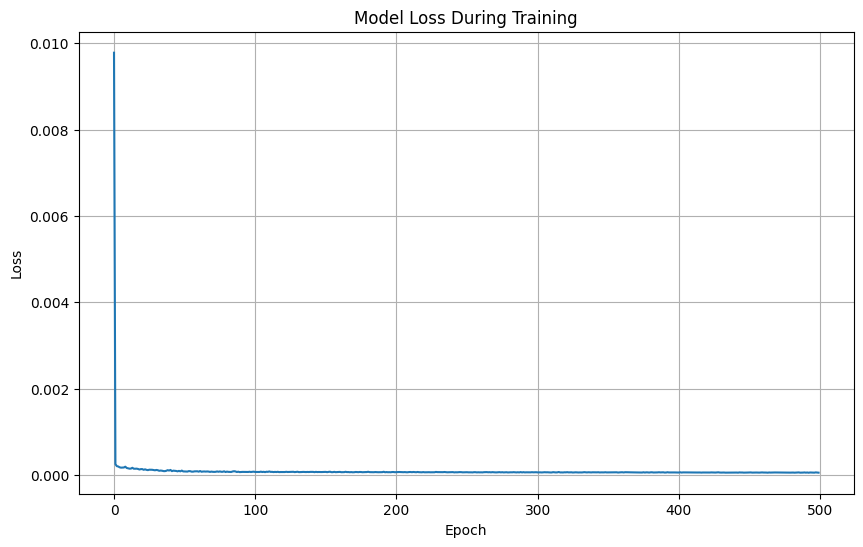

In [60]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(model_5.history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)